# Módulo 10 atividade 1

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.

1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

In [1]:
# importando bibliotecas
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()  
%matplotlib inline

In [2]:
df = pd.read_csv('Profissao- Cientista de Dados_M10_support material.csv')
df.head()

Unnamed: 0    data_ref  index sexo  posse_de_veiculo  posse_de_imovel  \
0           0  2015-01-01   8682    F             False             True   
1           1  2015-01-01  12830    M              True             True   
2           2  2015-01-01   2885    M              True             True   
3           3  2015-01-01  16168    F              True            False   
4           4  2015-01-01  12438    M             False            False   

   qtd_filhos   tipo_renda           educacao estado_civil tipo_residencia  \
0           1  Assalariado         Secundário       Casado            Casa   
1           0   Empresário         Secundário       Casado            Casa   
2           2  Assalariado  Superior completo       Casado            Casa   
3           0   Empresário         Secundário       Casado            Casa   
4           0  Assalariado         Secundário       Casado            Casa   

   idade  tempo_emprego  qt_pessoas_residencia    mau    renda  
0     36       3.575342                    3.0  False  3369.24  
1     42       0.860274                    2.0  False  6096.14  
2     31       8.065753                    4.0  False  5658.98  
3     50       1.208219                    2.0  False  7246.69  
4     52      13.873973                    2.0  False  4017.37

In [3]:
df_quantitative = df[['qtd_filhos', 'idade', 'tempo_emprego', 'qt_pessoas_residencia', 'renda']]
df_quantitative

qtd_filhos  idade  tempo_emprego  qt_pessoas_residencia    renda
0               1     36       3.575342                    3.0  3369.24
1               0     42       0.860274                    2.0  6096.14
2               2     31       8.065753                    4.0  5658.98
3               0     50       1.208219                    2.0  7246.69
4               0     52      13.873973                    2.0  4017.37
...           ...    ...            ...                    ...      ...
14995           1     37       2.046575                    3.0  1193.29
14996           1     30      12.079452                    3.0  2519.18
14997           0     40       2.161644                    2.0  1586.85
14998           0     47       3.295890                    2.0  6975.39
14999           0     50       3.049315                    2.0   993.86

[15000 rows x 5 columns]

C:\Users\earap\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\earap\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\earap\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\earap\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

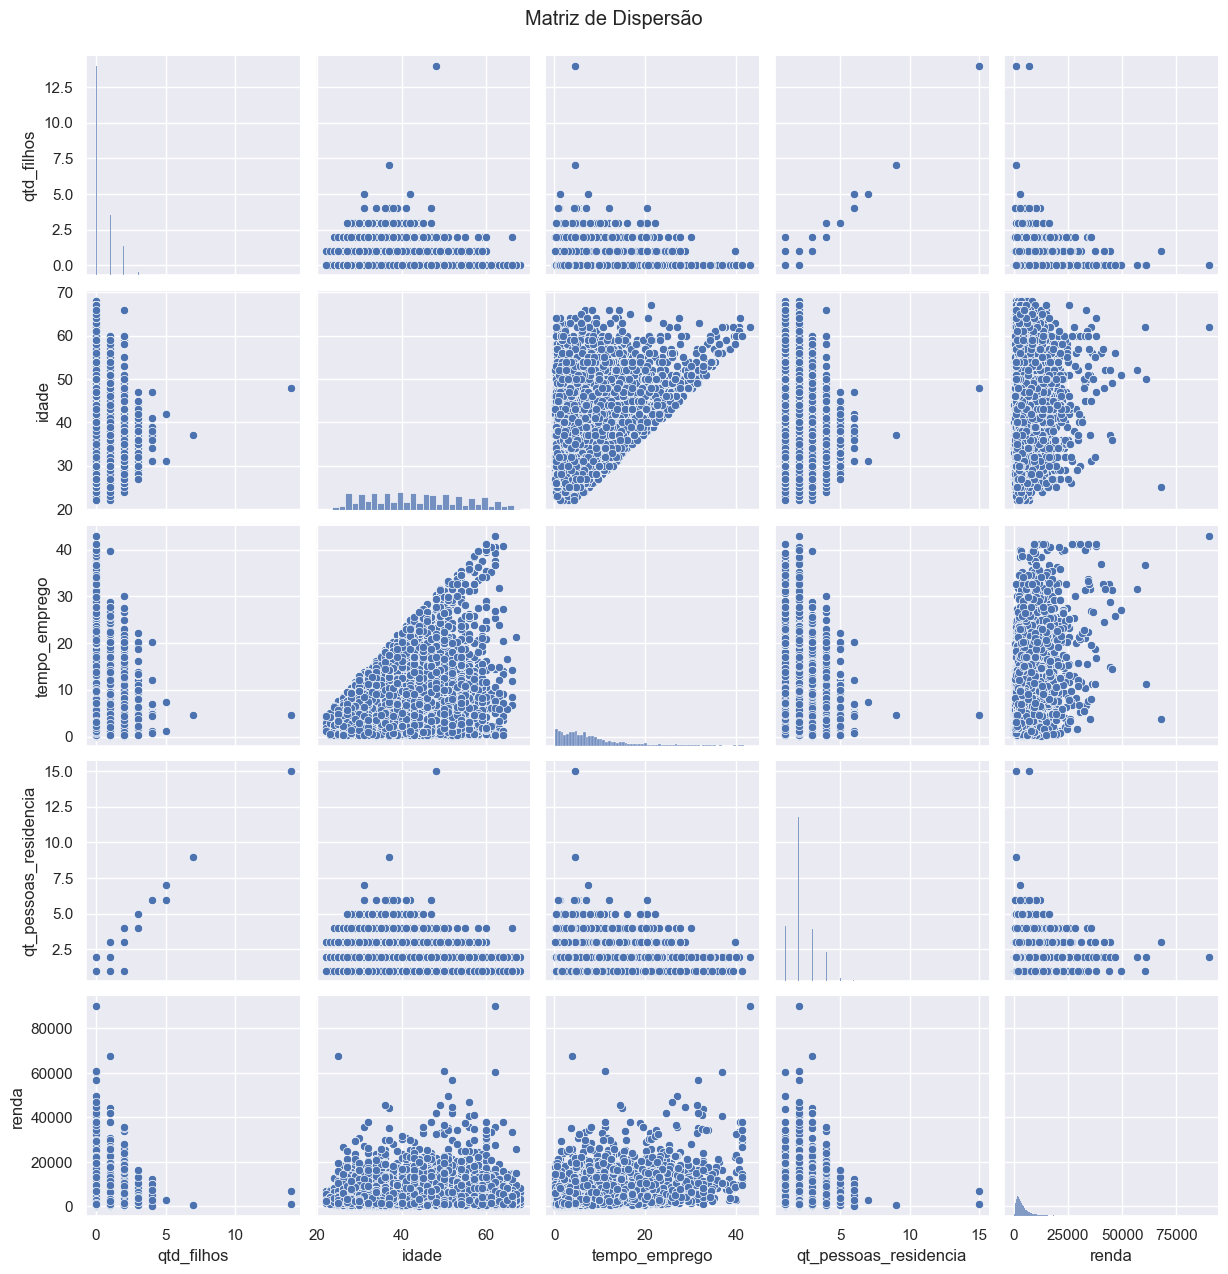

In [4]:
# matriz de dispersão
sns.pairplot(df_quantitative)
plt.suptitle('Matriz de Dispersão', y=1.02)
plt.show()

In [5]:
# calcular a correlação entre tempo_emprego e renda
corr1 = df_quantitative[['tempo_emprego', 'renda']].corr()
print(corr1)

               tempo_emprego     renda
tempo_emprego       1.000000  0.394235
renda               0.394235  1.000000


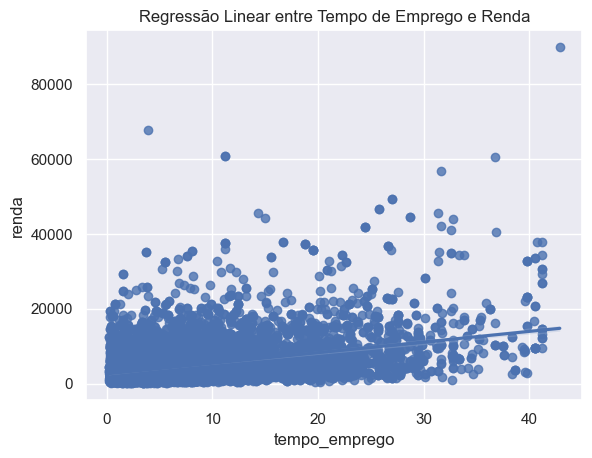

In [6]:
# plotando a regressão linear
reg1 = sns.regplot(x='tempo_emprego', y='renda', data=df_quantitative)
plt.title('Regressão Linear entre Tempo de Emprego e Renda')
plt.show()

In [7]:
# calcular a correlação entre tempo_emprego e renda
corr2 = df_quantitative[['qtd_filhos', 'qt_pessoas_residencia']].corr()
print(corr2)

                       qtd_filhos  qt_pessoas_residencia
qtd_filhos               1.000000               0.896488
qt_pessoas_residencia    0.896488               1.000000


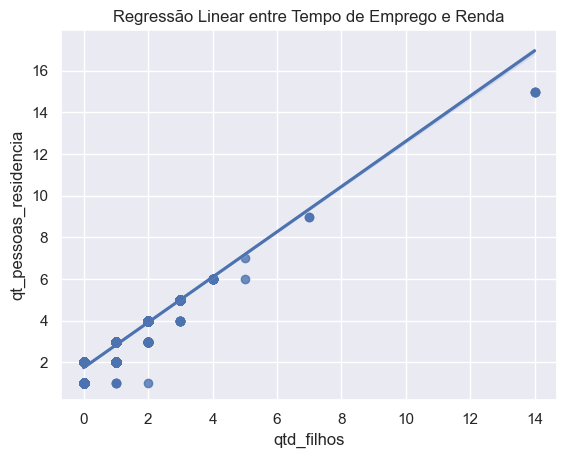

In [8]:
# plotando a regressão linear
reg2 = sns.regplot(x='qtd_filhos', y='qt_pessoas_residencia', data=df_quantitative)
plt.title('Regressão Linear entre Tempo de Emprego e Renda')
plt.show()

In [9]:
# matriz de correlações
corr = df_quantitative.corr()

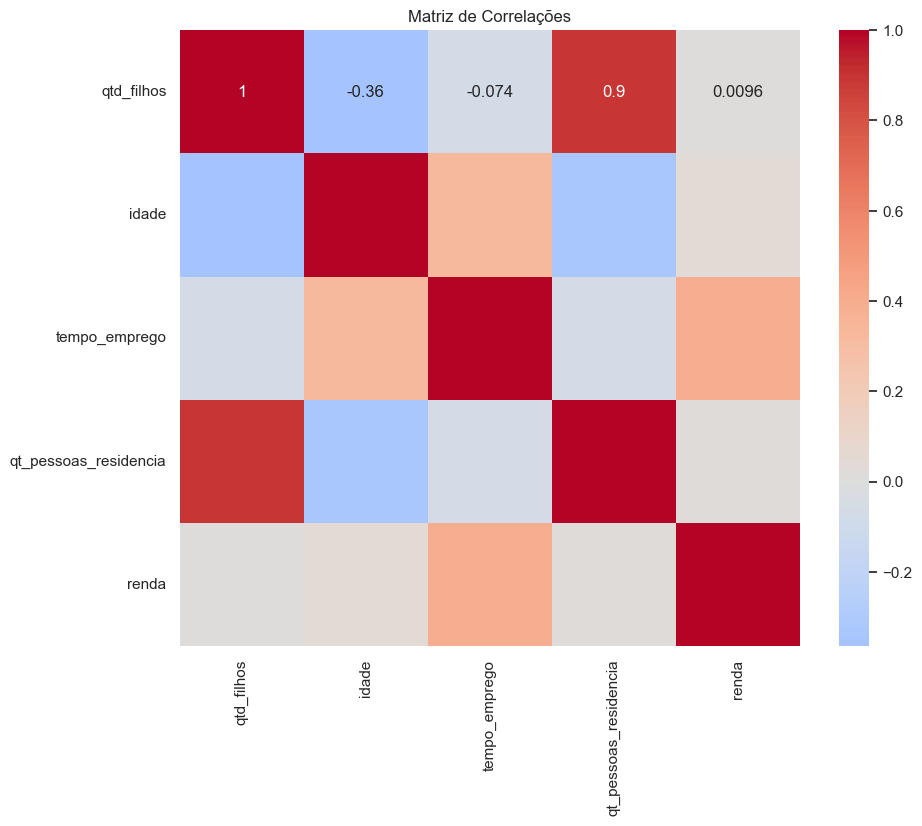

In [10]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr
            , annot=True
            , cmap='coolwarm'
            , center=0)
plt.title('Matriz de Correlações')
plt.show()

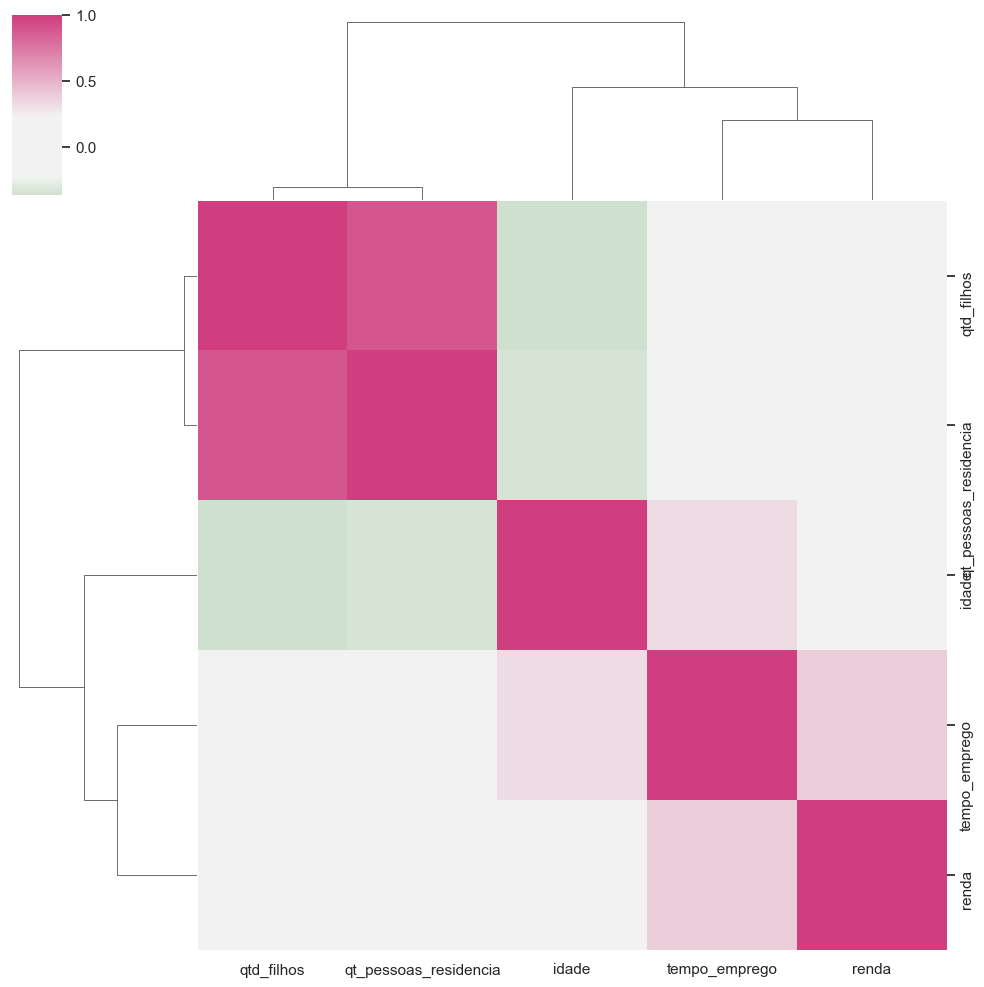

In [11]:
# criando uma v2 do heatmap, com dendogramas
cmap=sns.diverging_palette(h_neg=125
                           ,h_pos=350
                           ,as_cmap=True,
                           sep=60,center='light')

sns.clustermap(df_quantitative.corr()
               ,figsize=(10,10)
               ,center=0
               ,cmap=cmap)

### Interpretação dos Resultados

**Agrupamentos:** Variáveis que aparecem em grupos próximos no dendrograma têm correlações semelhantes com outras variáveis.

**Identificação de Relações:** Olhe para as cores no heatmap para identificar quais variáveis têm correlações fortes, sejam elas positivas ou negativas. 

Por exemplo:
As variáveis ``qtd_filhos`` e ``qt_pessoas_residencia`` têm uma forte correlação positiva, como indicado pela cor roxa escura.
``qt_pessoas_residencia`` parece ter uma correlação negativa com outras variáveis, como indicado pelas áreas em verde.


**Padrões Específicos:** Com base no dendrograma, pode-se identificar padrões ou clusters de variáveis que se comportam de maneira semelhante em relação às outras variáveis.

2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

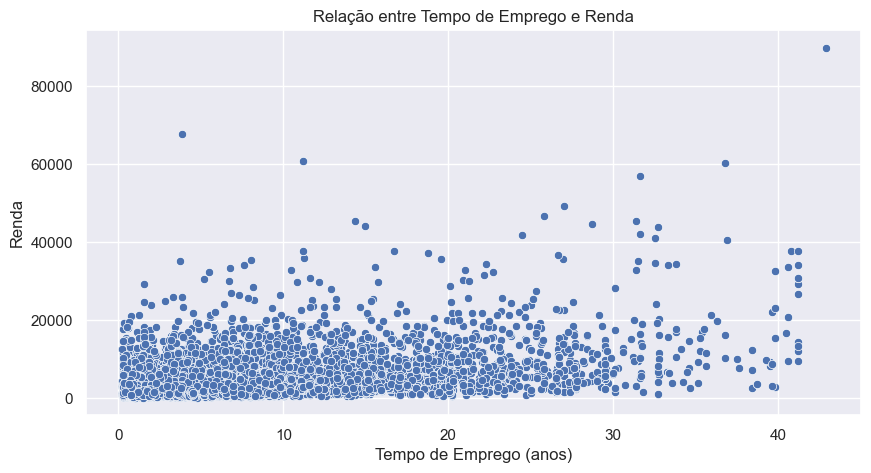

In [12]:
# gráfico de dispersão entre renda e tempo_emprego
plt.figure(figsize=(10, 5))
sns.scatterplot(x='tempo_emprego', y='renda', data=df_quantitative)
plt.title('Relação entre Tempo de Emprego e Renda')
plt.xlabel('Tempo de Emprego (anos)')
plt.ylabel('Renda')
plt.show()
plt.close()

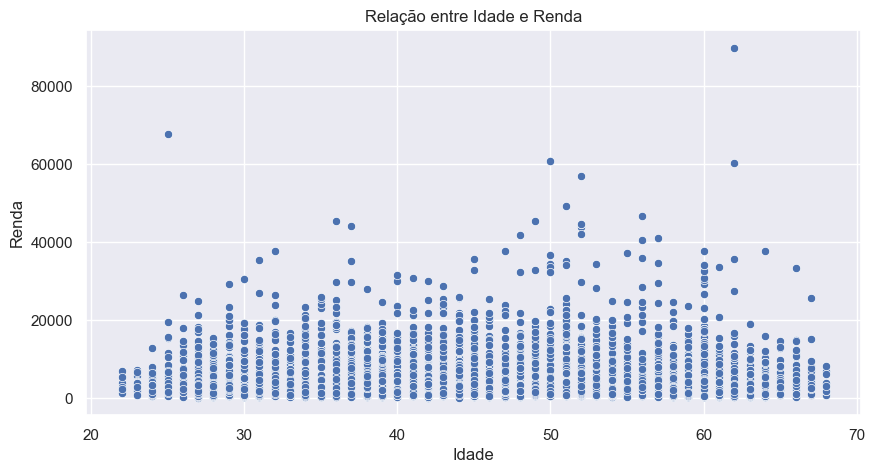

In [13]:
# gráfico de dispersão entre renda e idade
plt.figure(figsize=(10, 5))
sns.scatterplot(x='idade', y='renda', data=df)
plt.title('Relação entre Idade e Renda')
plt.xlabel('Idade')
plt.ylabel('Renda')
plt.show()

3) Na sua opinião, há outliers na variável renda?

Não. Vivemos em uma sociedade onde é normal pequenos grupos acumularem capital o suficiente para terem renda igual ou superior a grande maioria, independente de idade ou tempo de trabalho.

4) Calcule o logaritmo da variável renda e repita a sequência de análise

In [14]:
# copiando df_quantitative com as variáveis relevantes
df_quantitative_log = df_quantitative.copy()

In [15]:
# calculando o logaritmo da variável 'renda'
df_quantitative_log['log_renda'] = np.log(df_quantitative['renda'])

In [16]:
# verificando se o cálculo foi realizado corretamente
df_quantitative_log.head()

qtd_filhos  idade  tempo_emprego  qt_pessoas_residencia    renda  log_renda
0           1     36       3.575342                    3.0  3369.24   8.122442
1           0     42       0.860274                    2.0  6096.14   8.715411
2           2     31       8.065753                    4.0  5658.98   8.640999
3           0     50       1.208219                    2.0  7246.69   8.888300
4           0     52      13.873973                    2.0  4017.37   8.298383

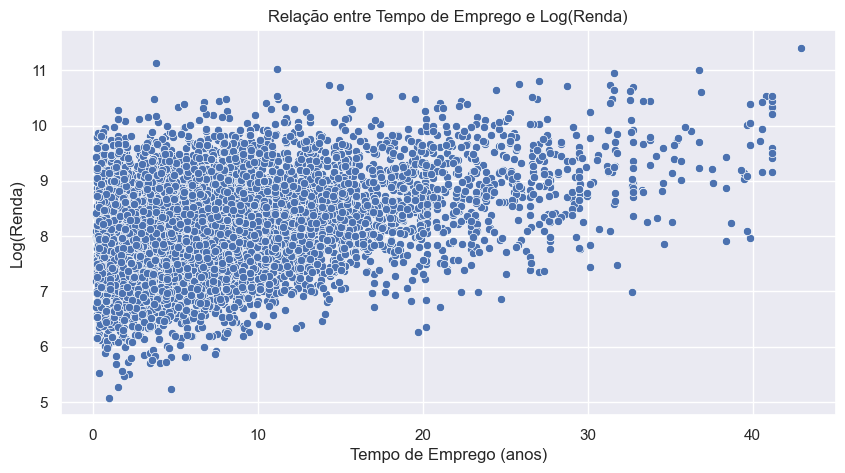

In [17]:
# gráfico de dispersão entre log_renda e tempo_emprego
plt.figure(figsize=(10, 5))
sns.scatterplot(x='tempo_emprego', y='log_renda', data=df_quantitative_log)
plt.title('Relação entre Tempo de Emprego e Log(Renda)')
plt.xlabel('Tempo de Emprego (anos)')
plt.ylabel('Log(Renda)')
plt.show()


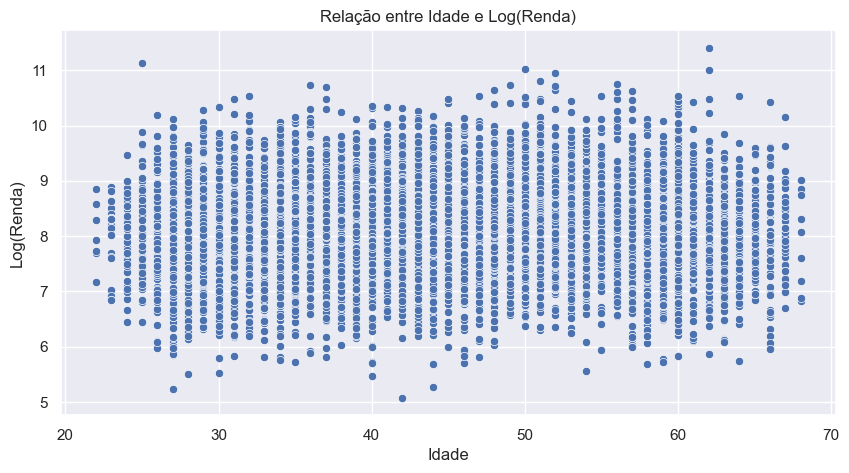

In [18]:
# gráfico de dispersão entre log_renda e idade
plt.figure(figsize=(10, 5))
sns.scatterplot(x='idade', y='log_renda', data=df_quantitative_log)
plt.title('Relação entre Idade e Log(Renda)')
plt.xlabel('Idade')
plt.ylabel('Log(Renda)')
plt.show()

5) A aplicação do LOG você acha que melhorou ou piorou a análise?

Elas trouxeram um maior entendimento acerca da dispersão da grande massa de dados. Nos dois gráficos é possível observar uma melhor distribuição dos pontos.